In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file
with open('drug-event-0002-of-0036.json', 'r') as file:
    data = json.load(file)

# View top-level keys
print("Top-level keys:", list(data.keys()))

# Extract the 'meta' and 'results' sections
meta = data['meta']
results = data['results']

print("Meta keys:", list(meta.keys()))
print("Sample result keys:", list(results[0].keys()))


Top-level keys: ['meta', 'results']
Meta keys: ['disclaimer', 'terms', 'license', 'last_updated', 'results']
Sample result keys: ['safetyreportversion', 'safetyreportid', 'primarysourcecountry', 'occurcountry', 'transmissiondateformat', 'transmissiondate', 'reporttype', 'serious', 'seriousnessother', 'receivedateformat', 'receivedate', 'receiptdateformat', 'receiptdate', 'fulfillexpeditecriteria', 'companynumb', 'duplicate', 'reportduplicate', 'primarysource', 'sender', 'receiver', 'patient']


In [2]:
# Analyze the 'results' section
def get_nested_keys(d, parent_key=''):
    keys = []
    for k, v in d.items():
        new_key = f"{parent_key}.{k}" if parent_key else k
        keys.append(new_key)
        if isinstance(v, dict):
            keys.extend(get_nested_keys(v, new_key))
    return keys

nested_keys = get_nested_keys(results[0])
print("Nested keys in results:", nested_keys)


Nested keys in results: ['safetyreportversion', 'safetyreportid', 'primarysourcecountry', 'occurcountry', 'transmissiondateformat', 'transmissiondate', 'reporttype', 'serious', 'seriousnessother', 'receivedateformat', 'receivedate', 'receiptdateformat', 'receiptdate', 'fulfillexpeditecriteria', 'companynumb', 'duplicate', 'reportduplicate', 'reportduplicate.duplicatesource', 'reportduplicate.duplicatenumb', 'primarysource', 'primarysource.reportercountry', 'primarysource.qualification', 'sender', 'sender.sendertype', 'sender.senderorganization', 'receiver', 'receiver.receivertype', 'receiver.receiverorganization', 'patient', 'patient.patientsex', 'patient.reaction', 'patient.drug']


In [8]:
# Flatten 'results' data for easier visualization
reaction_data = []
drug_data = []

for entry in results:
    # Patient reaction details
    if 'patient' in entry and 'reaction' in entry['patient']:
        for reaction in entry['patient']['reaction']:
            reaction_data.append({
                'safetyreportid': entry['safetyreportid'],
                'reaction': reaction['reactionmeddrapt'],
                'outcome': reaction.get('reactionoutcome', 'Unknown')
            })

    # Drug details
    if 'patient' in entry and 'drug' in entry['patient']:
        for drug in entry['patient']['drug']:
            drug_data.append({
                'safetyreportid': entry['safetyreportid'],
                'medicinalproduct': drug['medicinalproduct'],
                'indication': drug.get('drugindication', 'Unknown'),
                'active_substance': drug.get('activesubstance', {}).get('activesubstancename', 'Unknown')  # Handle missing key
            })

reaction_df = pd.DataFrame(reaction_data)
drug_df = pd.DataFrame(drug_data)

# Display the structure of DataFrames
print("Reaction DataFrame:")
print(reaction_df.head())
print("\nDrug DataFrame:")
print(drug_df.head())


Reaction DataFrame:
  safetyreportid                    reaction  outcome
0       19580971             Prostate cancer        6
1       19581714  Colorectal cancer stage II        2
2       19599804                 Dehydration  Unknown
3       19599804                   Diarrhoea  Unknown
4       19597158             Prostate cancer        6

Drug DataFrame:
  safetyreportid    medicinalproduct indication          active_substance
0       19580971  RANITIDINE CAPSULE  DYSPEPSIA                RANITIDINE
1       19580971         RANITIDINE.  DYSPEPSIA                RANITIDINE
2       19580971              ZANTAC  DYSPEPSIA  RANITIDINE HYDROCHLORIDE
3       19580971              ZANTAC  DYSPEPSIA  RANITIDINE HYDROCHLORIDE
4       19580971         RANITIDINE.  DYSPEPSIA                RANITIDINE


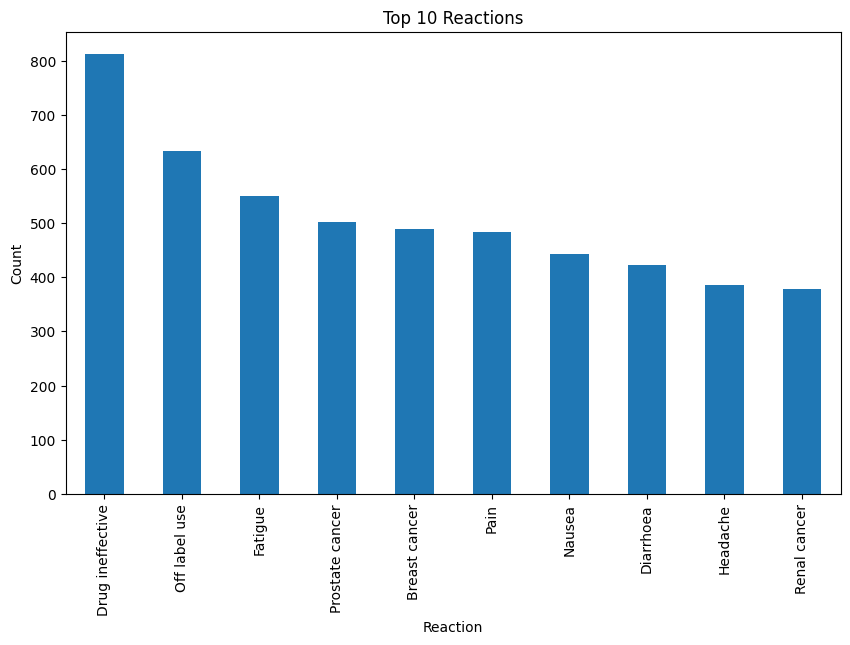

In [9]:
# Reaction count plot
reaction_counts = reaction_df['reaction'].value_counts()

plt.figure(figsize=(10, 6))
reaction_counts.head(10).plot(kind='bar')
plt.title('Top 10 Reactions')
plt.xlabel('Reaction')
plt.ylabel('Count')
plt.show()


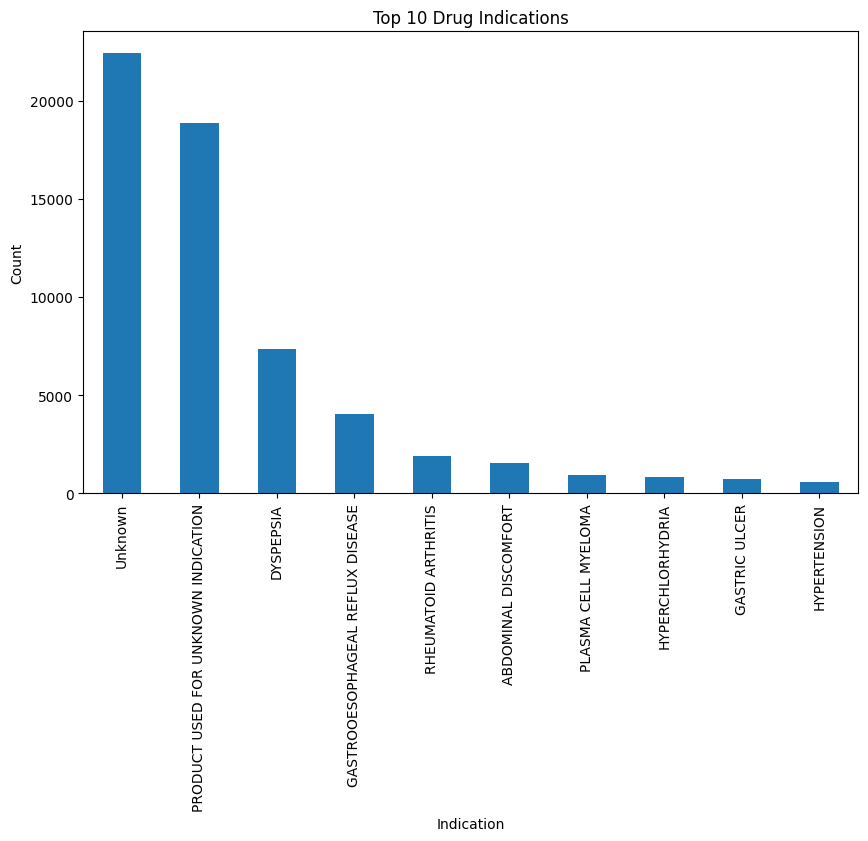

In [10]:
# Drug indication plot
indication_counts = drug_df['indication'].value_counts()

plt.figure(figsize=(10, 6))
indication_counts.head(10).plot(kind='bar')
plt.title('Top 10 Drug Indications')
plt.xlabel('Indication')
plt.ylabel('Count')
plt.show()


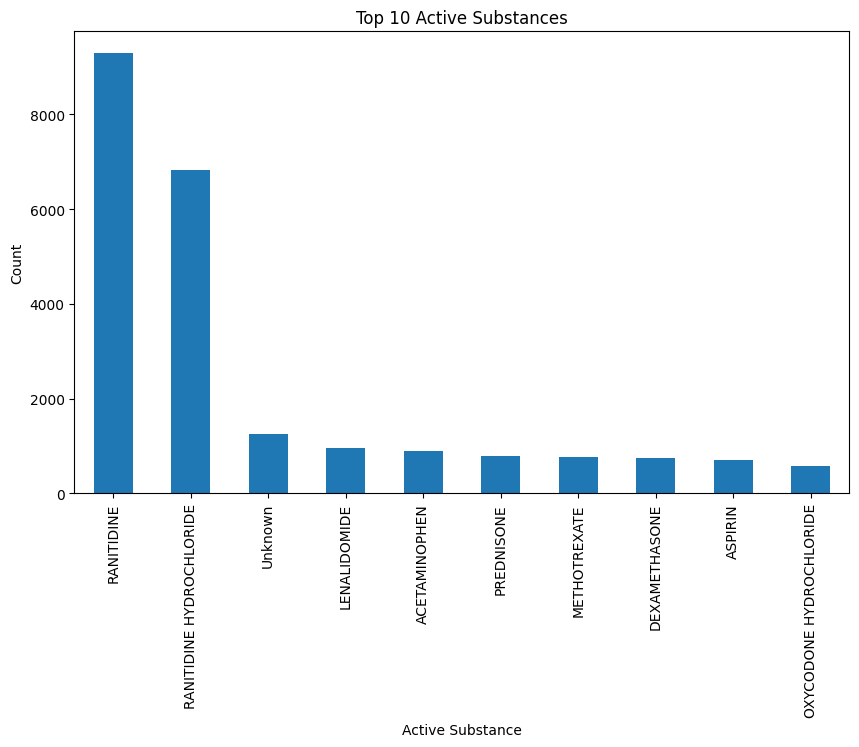

In [11]:
# Active substance plot
active_substance_counts = drug_df['active_substance'].value_counts()

plt.figure(figsize=(10, 6))
active_substance_counts.head(10).plot(kind='bar')
plt.title('Top 10 Active Substances')
plt.xlabel('Active Substance')
plt.ylabel('Count')
plt.show()


In [2]:
import json

# Load the JSON file
with open('drug-event-0002-of-0036.json', 'r') as file:
    data = json.load(file)

# Recursive function to print nested JSON structure and calculate depth
def write_nested_structure(d, file, level=1):
    """
    Recursively writes the structure of a nested dictionary or list to a file.
    :param d: The dictionary or list to analyze.
    :param file: Opened file object to write the structure.
    :param level: Current level of nesting.
    :return: Maximum depth of the structure.
    """
    max_depth = level
    if isinstance(d, dict):
        for key, value in d.items():
            file.write("  " * (level - 1) + f"{level}. {key}\n")
            max_depth = max(max_depth, write_nested_structure(value, file, level + 1))
    elif isinstance(d, list):
        file.write("  " * (level - 1) + f"{level}. List of {len(d)} items\n")
        if len(d) > 0 and isinstance(d[0], dict):  # Write structure of the first item in the list
            file.write("  " * level + "(First item structure):\n")
            max_depth = max(max_depth, write_nested_structure(d[0], file, level + 1))
    else:
        # Write value type for leaf nodes
        file.write("  " * (level - 1) + f"(Value type: {type(d).__name__})\n")
    return max_depth

# Write the structure to a text file
output_file = 'nested_structure.txt'
with open(output_file, 'w') as f:
    f.write("Top-level structure:\n")
    max_depth = write_nested_structure(data, f)

# Print maximum depth
print(f"Nested structure written to {output_file}")
print(f"Maximum depth of JSON: {max_depth}")


Nested structure written to nested_structure.txt
Maximum depth of JSON: 8


In [3]:
import ijson
from tqdm import tqdm
import pandas as pd

# Path to the large JSON file
json_file_path = 'drug-event-0002-of-0036.json'

# Initialize storage for processed data
reaction_data = []
drug_data = []

# Open the file for streaming
with open(json_file_path, 'r') as file:
    # Use ijson to incrementally parse the "results" array
    results = ijson.items(file, 'results.item')
    total_count = 12000  # Replace with the total number of items if known

    # Set up a progress bar with tqdm
    with tqdm(total=total_count, desc="Processing JSON") as pbar:
        for entry in results:
            # Process reaction data
            if 'patient' in entry and 'reaction' in entry['patient']:
                for reaction in entry['patient']['reaction']:
                    reaction_data.append({
                        'safetyreportid': entry['safetyreportid'],
                        'reaction': reaction['reactionmeddrapt'],
                        'outcome': reaction.get('reactionoutcome', 'Unknown')
                    })

            # Process drug data
            if 'patient' in entry and 'drug' in entry['patient']:
                for drug in entry['patient']['drug']:
                    drug_data.append({
                        'safetyreportid': entry['safetyreportid'],
                        'medicinalproduct': drug['medicinalproduct'],
                        'indication': drug.get('drugindication', 'Unknown'),
                        'active_substance': drug.get('activesubstance', {}).get('activesubstancename', 'Unknown')
                    })

            # Update the progress bar
            pbar.update(1)

# Convert lists to DataFrames for further analysis
reaction_df = pd.DataFrame(reaction_data)
drug_df = pd.DataFrame(drug_data)

# Save the processed data to CSV files
reaction_df.to_csv('reaction_data.csv', index=False)
drug_df.to_csv('drug_data.csv', index=False)

# Output summary
print(f"Processed {len(reaction_data)} reactions and {len(drug_data)} drugs.")
print("Reaction data saved to 'reaction_data.csv'.")
print("Drug data saved to 'drug_data.csv'.")


Processing JSON: 100%|████████████████████| 12000/12000 [00:02<00:00, 5198.41it/s]


Processed 42563 reactions and 78527 drugs.
Reaction data saved to 'reaction_data.csv'.
Drug data saved to 'drug_data.csv'.


In [4]:
# %pip install ijson tqdm


Merging Data: 9it [00:00, 105.38it/s]
Encoding Data: 100%|██████████████████████████████| 25/25 [00:00<00:00, 46.33it/s]


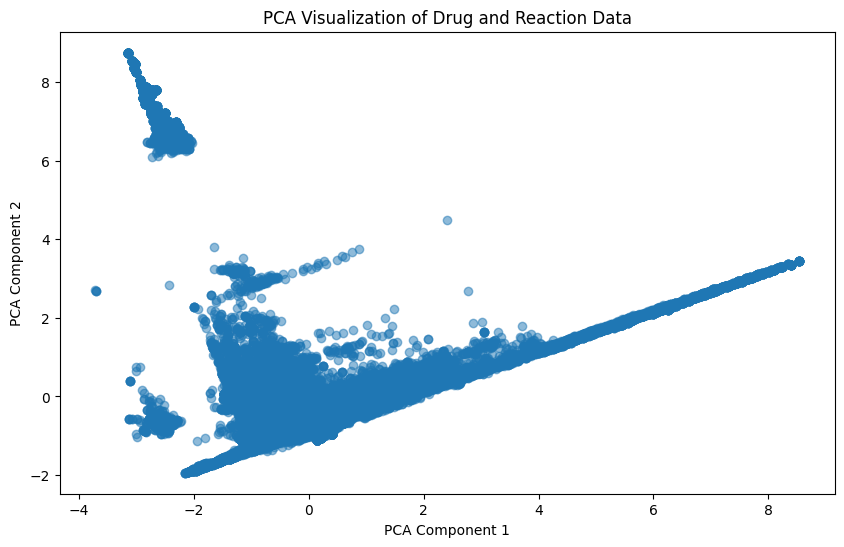

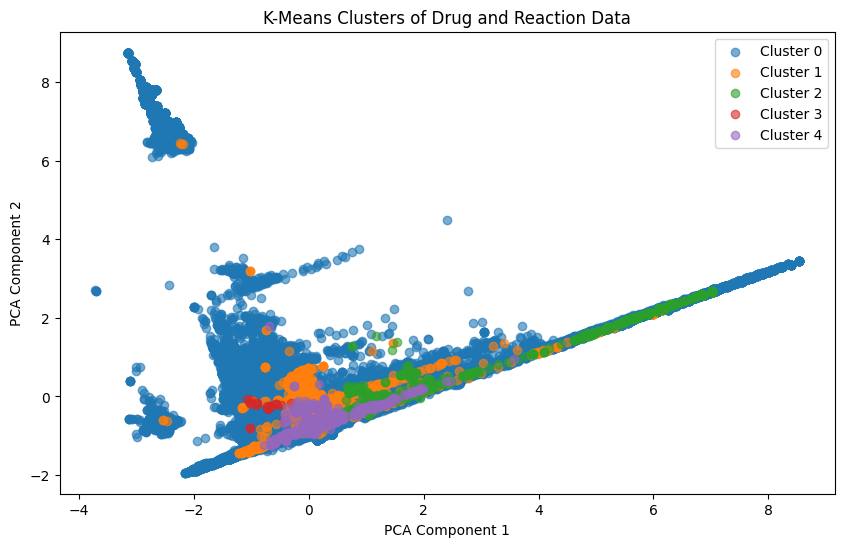

/opt/anaconda3/envs/bigdata/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


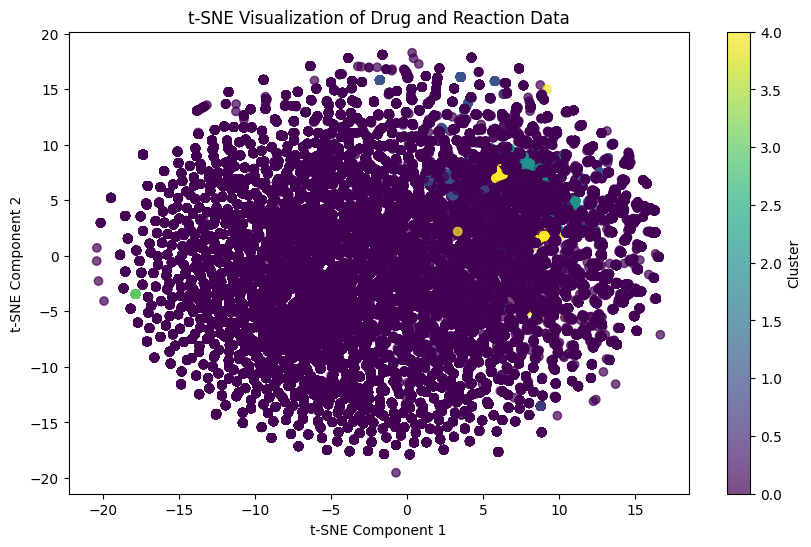

In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tqdm import tqdm

# Load the data in chunks
drug_data = pd.read_csv('drug_data.csv', chunksize=5000)
reaction_data = pd.read_csv('reaction_data.csv', chunksize=5000)

# Merge datasets incrementally
merged_chunks = []
for drug_chunk, reaction_chunk in tqdm(zip(drug_data, reaction_data), desc="Merging Data"):
    merged_chunk = pd.merge(drug_chunk, reaction_chunk, on='safetyreportid', how='outer')
    merged_chunks.append(merged_chunk)

# Concatenate merged chunks into a single DataFrame
merged_data = pd.concat(merged_chunks, ignore_index=True)

# Initialize encoders and scalers
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
scaler = StandardScaler()

# Process data in chunks for encoding
categorical_columns = ['medicinalproduct', 'indication', 'reaction']
encoded_features_list = []

for chunk_start in tqdm(range(0, len(merged_data), 5000), desc="Encoding Data"):
    chunk = merged_data.iloc[chunk_start:chunk_start + 5000]
    encoded_chunk = encoder.fit_transform(chunk[categorical_columns])
    encoded_features_list.append(pd.DataFrame(encoded_chunk))  # Directly append as DataFrame

# Combine encoded features
encoded_features = pd.concat(encoded_features_list, ignore_index=True)

# Scale features incrementally
scaled_features = scaler.fit_transform(encoded_features)

# Impute missing values in scaled features
imputer = SimpleImputer(strategy='mean')  # Replace missing values with mean
scaled_features_imputed = imputer.fit_transform(scaled_features)

# Dimensionality reduction using Incremental PCA
ipca = IncrementalPCA(n_components=2, batch_size=5000)
pca_results = ipca.fit_transform(scaled_features_imputed)

# Visualize PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1], alpha=0.5)
plt.title('PCA Visualization of Drug and Reaction Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Apply clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features_imputed)  # Use imputed features
merged_data['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(5):  # Adjust to match number of clusters
    cluster_data = pca_results[clusters == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}', alpha=0.6)
plt.title('K-Means Clusters of Drug and Reaction Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Apply t-SNE for more detailed visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(scaled_features_imputed)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('t-SNE Visualization of Drug and Reaction Data')
plt.colorbar(label='Cluster')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.decomposition import TruncatedSVD
# from scipy.sparse import vstack
# from tqdm import tqdm

# # Load the data
# drug_data = pd.read_csv('drug_data.csv')
# reaction_data = pd.read_csv('reaction_data.csv')

# # Merge datasets on 'safetyreportid' and remove duplicates
# merged_data = pd.merge(drug_data, reaction_data, on='safetyreportid', how='outer')
# merged_data = merged_data.drop_duplicates()

# # Define features and target
# categorical_features = ['medicinalproduct', 'indication', 'reaction', 'active_substance']
# target_column = 'outcome'

# # Replace missing values in categorical features with "Unknown"
# merged_data[categorical_features] = merged_data[categorical_features].fillna("Unknown")

# # Replace missing values in target column with "Unknown"
# merged_data[target_column] = merged_data[target_column].fillna("Unknown")

# # Fit the encoder globally on the entire categorical data
# encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
# encoder.fit(merged_data[categorical_features])  # Fit on all data

# # Incremental one-hot encoding
# encoded_features_list = []
# for chunk_start in tqdm(range(0, len(merged_data), 5000), desc="Encoding Data"):
#     chunk = merged_data.iloc[chunk_start:chunk_start + 5000]
#     encoded_chunk = encoder.transform(chunk[categorical_features])  # Transform using pre-fitted encoder
#     encoded_features_list.append(encoded_chunk)

# # Combine encoded features into a single sparse matrix
# encoded_features = vstack(encoded_features_list)

# # Dimensionality reduction using TruncatedSVD
# print("Applying TruncatedSVD for dimensionality reduction...")
# svd = TruncatedSVD(n_components=500, random_state=42)  # Reduce to 500 dimensions
# reduced_features = svd.fit_transform(encoded_features)

# # Scale features
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(reduced_features)

# # Encode target labels
# target_labels = merged_data[target_column].astype(str)
# target_classes = target_labels.unique()
# target_mapping = {label: i for i, label in enumerate(target_classes)}
# encoded_target = target_labels.map(target_mapping).values

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(scaled_features, encoded_target, test_size=0.2, random_state=42)

# # Train a Gradient Boosting model
# print("Training Gradient Boosting...")
# gb_model = GradientBoostingClassifier(random_state=42)
# gb_model.fit(X_train, y_train)

# # Predict and evaluate Gradient Boosting
# y_pred_gb = gb_model.predict(X_test)
# print("Gradient Boosting - Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_gb))
# print("\nGradient Boosting - Classification Report:")
# print(classification_report(y_test, y_pred_gb))

# # Train a Naive Bayes model
# print("Training Naive Bayes...")
# nb_model = GaussianNB()
# nb_model.fit(X_train, y_train)

# # Predict and evaluate Naive Bayes
# y_pred_nb = nb_model.predict(X_test)
# print("Naive Bayes - Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_nb))
# print("\nNaive Bayes - Classification Report:")
# print(classification_report(y_test, y_pred_nb))


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report, confusion_matrix
from joblib import Parallel, delayed
from scipy.sparse import vstack  # Importing vstack for sparse matrices
import numpy as np
from lightgbm import LGBMClassifier  # Faster alternative to Gradient Boosting
from tqdm import tqdm

# Load the data
drug_data = pd.read_csv('drug_data.csv')
reaction_data = pd.read_csv('reaction_data.csv')

# Merge datasets on 'safetyreportid' and remove duplicates
merged_data = pd.merge(drug_data, reaction_data, on='safetyreportid', how='outer')
merged_data = merged_data.drop_duplicates()

# Define features and target
categorical_features = ['medicinalproduct', 'indication', 'reaction', 'active_substance']
target_column = 'outcome'

# Replace missing values in categorical features with "Unknown"
merged_data[categorical_features] = merged_data[categorical_features].fillna("Unknown")
merged_data[target_column] = merged_data[target_column].fillna("Unknown")

# Fit the encoder globally
encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
encoder.fit(merged_data[categorical_features])

# Encode data in parallel
def encode_chunk(chunk):
    return encoder.transform(chunk)

chunk_size = 5000
encoded_features_list = Parallel(n_jobs=-1)(
    delayed(encode_chunk)(merged_data.iloc[i:i + chunk_size][categorical_features])
    for i in tqdm(range(0, len(merged_data), chunk_size), desc="Encoding Data")
)

# Combine encoded features
encoded_features = vstack(encoded_features_list)

# Dimensionality reduction using TruncatedSVD
print("Applying TruncatedSVD for dimensionality reduction...")
svd = TruncatedSVD(n_components=500, random_state=42)
reduced_features = svd.fit_transform(encoded_features)

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(reduced_features)

# Encode target labels
target_labels = merged_data[target_column].astype(str)
target_classes = target_labels.unique()
target_mapping = {label: i for i, label in enumerate(target_classes)}
encoded_target = target_labels.map(target_mapping).values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, encoded_target, test_size=0.2, random_state=42)

# Train LightGBM model (faster alternative to Gradient Boosting)
print("Training LightGBM with progress bar...")
lgbm_model = LGBMClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=1)
lgbm_model.fit(X_train, y_train)

# Predict and evaluate LightGBM
y_pred_lgbm = lgbm_model.predict(X_test)
print("LightGBM - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgbm))
print("\nLightGBM - Classification Report:")
print(classification_report(y_test, y_pred_lgbm))


Encoding Data: 100%|███████████████████████████| 74/74 [00:00<00:00, 508.83it/s]


Applying TruncatedSVD for dimensionality reduction...
Training LightGBM with progress bar...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.144025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 127500
[LightGBM] [Info] Number of data points in the train set: 295279, number of used features: 500
[LightGBM] [Info] Start training from score -0.760725
[LightGBM] [Info] Start training from score -2.024385
[LightGBM] [Info] Start training from score -3.207692
[LightGBM] [Info] Start training from score -3.367889
[LightGBM] [Info] Start training from score -1.199756
[LightGBM] [Info] Start training from score -3.860312
[LightGBM] [Info] Start training from score -5.696961
LightGBM - Confusion Matrix:
[[30356   609    49   112  2980   132   128]
 [ 7157  1626    54    82   699    46    73]
 [ 2443   159   178    27   201    20    22]
 [ 1512    97     9   795    92    11    17]
 [ 8635   215    28    33 1